In [1]:
%load_ext autoreload
%autoreload 2

## Import

In [2]:
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

import torchvision

In [3]:
import torch
torch.__version__

'1.9.1+cu102'

In [4]:
import os
os.chdir("..")

In [5]:
from vision_transformers.datasets.cifar import CIFARDataModule
from vision_transformers.transformers.vit.vit_lightning import ViTModule
from vision_transformers.transformers.conv_mixer.conv_mixer_lightning import ConvMixerModule
from vision_transformers.utils.utils_plot import imshow

## Dataset

In [6]:
## PARAMS
batch_size = 128
num_workers = 8
patience = 3
model_path = "data/models/conv_mixer"
epochs = 100

In [7]:
data = CIFARDataModule("data",batch_size,num_workers)

In [8]:
data.setup()

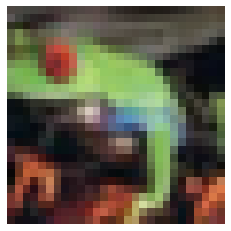

In [9]:
imshow(data.train_dataset[0][0])

## Model

In [10]:
model = ConvMixerModule(10,1e-3)


## Training

In [11]:
callbacks = [
    EarlyStopping(
        monitor="val_acc",
        mode='max',
        patience=patience,
        strict=False
    ),

    #ModelCheckpoint(
    #    dirpath=model_path,
    #    monitor="val_acc",
    #    save_top_k=3,
    #    filename="{epoch}-{val_acc:.2f}-{val_loss:.2f}",
    #    save_last=True,
    #),
]

In [12]:
trainer = pl.Trainer(
    gpus=1,
    max_epochs=epochs,
    check_val_every_n_epoch=1,
    log_every_n_steps=3,
    callbacks=callbacks,
    #  precision=16,
)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


In [13]:
trainer.fit(model, data)

/home/samsja/.cache/pypoetry/virtualenvs/vision-transformers-67SPDOaB-py3.9/lib/python3.9/site-packages/pytorch_lightning/core/datamodule.py:423: LightningDeprecationWarning: DataModule.setup has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.setup.
  rank_zero_deprecation(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | model   | ConvMixer        | 561 K 
1 | loss_fn | CrossEntropyLoss | 0     
2 | acc_fn  | Accuracy         | 0     
---------------------------------------------
561 K     Trainable params
0         Non-trainable params
561 K     Total params
2.246     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]